   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

<ipython-input-2-d789b8b8a2b7>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)  # Remplir les âges manquants par la moyenne
<ipython-input-2-d789b8b8a2b7>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

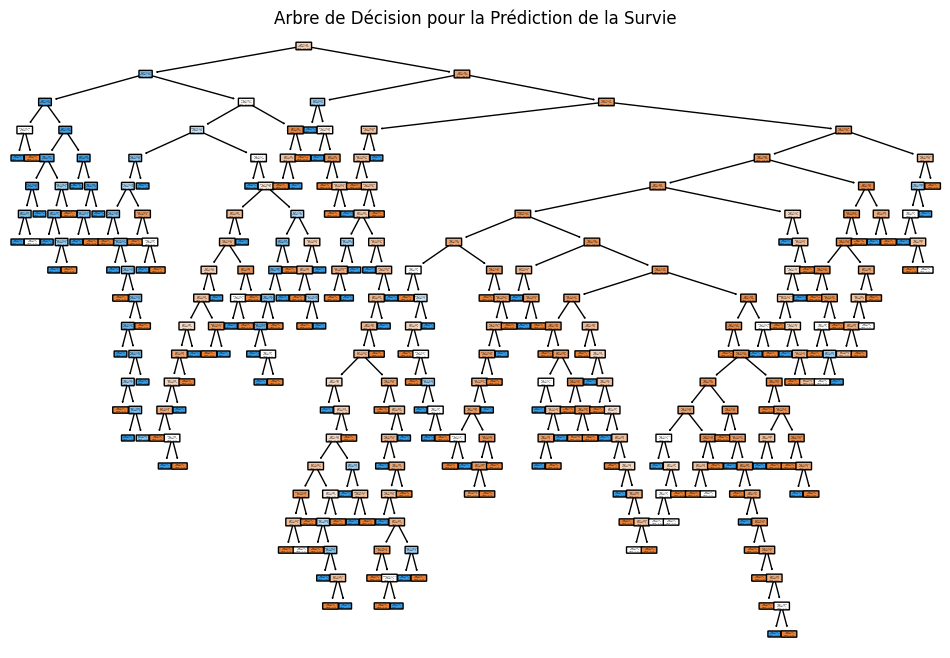

Naive Bayes - Accuracy: 0.7932960893854749
Naive Bayes - Taux d'erreur: 0.2067039106145251
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       105
           1       0.74      0.77      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179


Comparaison des performances des modèles :
Arbre de décision - Accuracy: 0.770949720670391, Taux d'erreur: 0.22905027932960897
Naive Bayes - Accuracy: 0.7932960893854749, Taux d'erreur: 0.2067039106145251


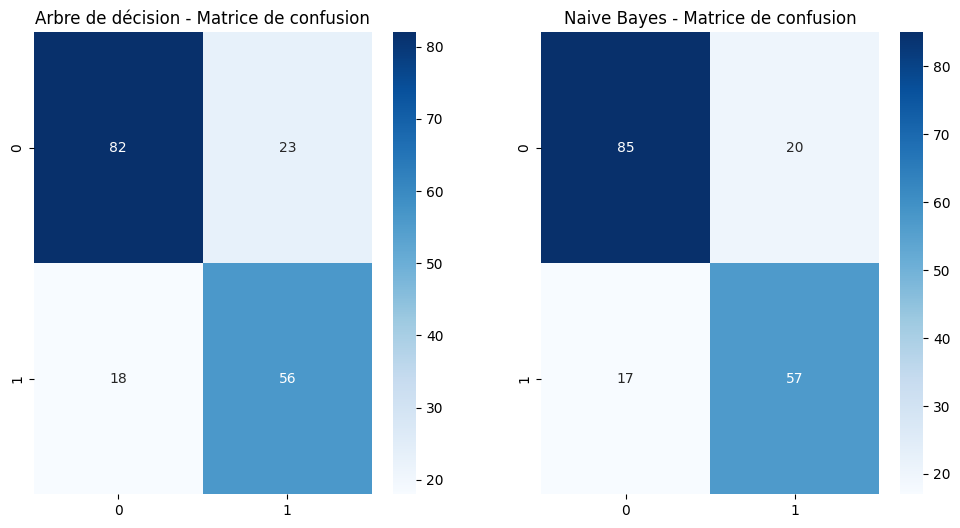

'decision_tree.png'

In [2]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from graphviz import Source

# Chargement des données
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

# Exploration rapide des données
print(train_data.head())
print(train_data.info())

# Prétraitement des données
# 1. Gestion des valeurs manquantes
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)  # Remplir les âges manquants par la moyenne
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)  # Remplir les embarquements manquants par le mode
train_data['Fare'].fillna(train_data['Fare'].mean(), inplace=True)  # Remplir les tarifs manquants par la moyenne

# 2. Conversion des variables catégorielles en numériques
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])

# 3. Sélection des caractéristiques (features) et de la variable cible (target)
X = train_data[['Age', 'Sex', 'Pclass', 'Fare', 'Embarked']]  # Caractéristiques
y = train_data['Survived']  # Variable cible

# 4. Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Entraînement du modèle Arbre de Décision
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Prédictions et évaluation pour l'Arbre de Décision
y_pred_tree = tree_model.predict(X_test)

# Calcul de l'accuracy et du taux d'erreur
accuracy_tree = accuracy_score(y_test, y_pred_tree)
error_rate_tree = 1 - accuracy_tree

print(f"Arbre de décision - Accuracy: {accuracy_tree}")
print(f"Arbre de décision - Taux d'erreur: {error_rate_tree}")
print(classification_report(y_test, y_pred_tree))

# Affichage de l'arbre de décision avec plot_tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, filled=True, feature_names=["Age", "Sex", "Pclass", "Fare", "Embarked"],
          class_names=["Not Survived", "Survived"], rounded=True)
plt.title("Arbre de Décision pour la Prédiction de la Survie")
plt.show()

# 6. Entraînement du modèle Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Prédictions et évaluation pour le Naive Bayes
y_pred_nb = nb_model.predict(X_test)

# Calcul de l'accuracy et du taux d'erreur
accuracy_nb = accuracy_score(y_test, y_pred_nb)
error_rate_nb = 1 - accuracy_nb

print(f"Naive Bayes - Accuracy: {accuracy_nb}")
print(f"Naive Bayes - Taux d'erreur: {error_rate_nb}")
print(classification_report(y_test, y_pred_nb))

# 7. Comparaison des modèles
print(f"\nComparaison des performances des modèles :")
print(f"Arbre de décision - Accuracy: {accuracy_tree}, Taux d'erreur: {error_rate_tree}")
print(f"Naive Bayes - Accuracy: {accuracy_nb}, Taux d'erreur: {error_rate_nb}")

# 8. Visualisation des résultats avec des matrices de confusion
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Arbre de décision - Matrice de confusion")
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt="d", cmap="Blues", ax=ax[1])
ax[1].set_title("Naive Bayes - Matrice de confusion")
plt.show()

# 9. Visualisation de l'arbre de décision avec Graphviz
dot_data = export_graphviz(tree_model, out_file=None,
                           feature_names=["Age", "Sex", "Pclass", "Fare", "Embarked"],
                           class_names=["Not Survived", "Survived"],
                           filled=True, rounded=True, special_characters=True)

graph = Source(dot_data)
graph.render("decision_tree", format="png", view=True)  # Sauvegarde et ouverture du graphique


